<a href="https://colab.research.google.com/github/Limm-jk/MachineLearning_ex_UsingColab/blob/master/movie_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
movie = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/movie/movies_train.csv")
movie.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [6]:
movie.isnull().any() # 빈값 있는지 확인

title             False
distributor       False
genre             False
release_time      False
time              False
screening_rat     False
director          False
dir_prev_bfnum     True
dir_prev_num      False
num_staff         False
num_actor         False
box_off_num       False
dtype: bool

In [8]:
movie = movie.fillna(0) #빈값 0으로 채움
movie.head(5) #첫 값에 빈값이 있었으므로 head로 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


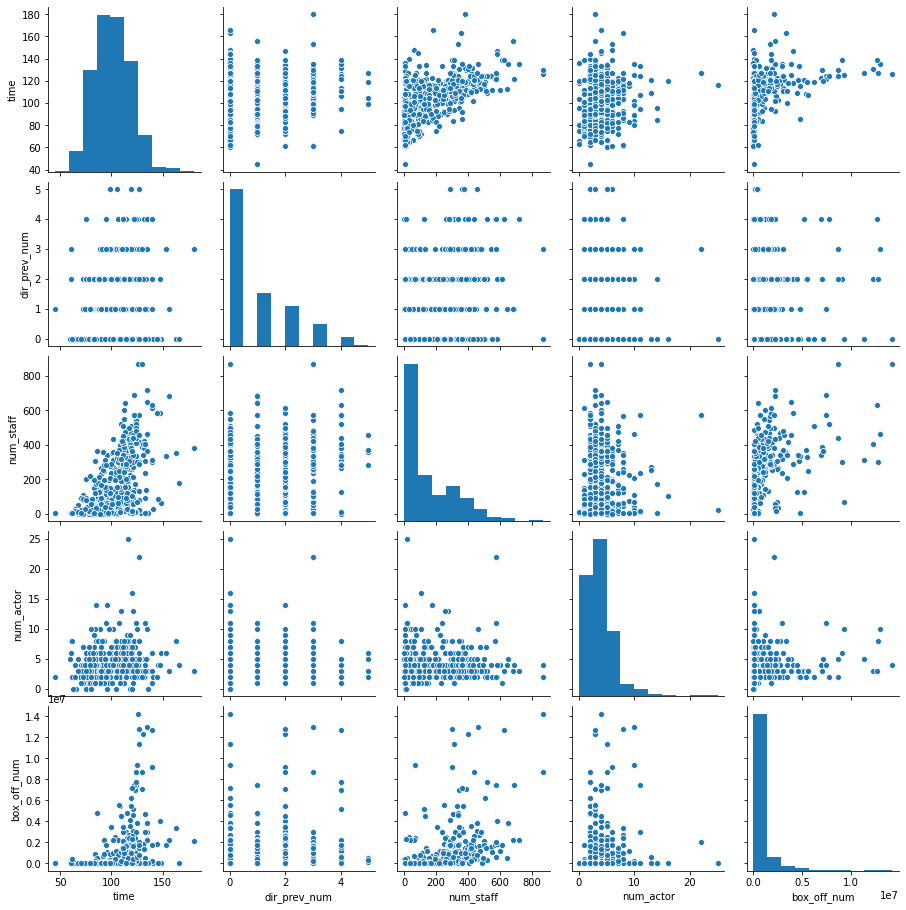

In [17]:
movie_object = movie.select_dtypes(include=['object'])
movie_int = movie.select_dtypes(include=['int'])
movie_preNum = movie.select_dtypes(include=['float'])
#각각 자료형으로 나눠봄 시각화 시키기 위함 근데 마지막거는 하나라 쓸모없네..?

import seaborn as sns #시각화용

sns.pairplot(movie_int)

In [0]:
from sklearn.manifold import TSNE 
#데이터 차원 감소 위에 건 너무 많다 이겁니다.

